In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
import sys
from os import path
sys.path.insert(0, "../../ISANet/")
sys.path.insert(0, "../../experiments/")

from utils import optimize_monk_f, print_result, print_ls_result, save_csv
from isanet.optimizer import NCG, LBFGS
import matplotlib.pyplot as plt
import pandas as pd

# Monk 2

In [8]:
monk     =  "2"
reg      =  1e-4
seed     =  987
results  =  []
ng_eps   =  3e-5
l_eps    =  3e-5
max_iter =  1000
verbose  =  0

In [9]:
#############################
#        LBFGS m = 3
#############################
c1          = 1e-4 
c2          = .9 
m1          = 3
ln_maxiter  = 100
#############################
optimizer = LBFGS(m = m1, c1=c1, c2=c2, ln_maxiter = ln_maxiter, norm_g_eps = ng_eps, l_eps = l_eps)
model_history, opt_history, time = optimize_monk_f(monk=monk, 
                                                   reg = reg, 
                                                   seed=seed, 
                                                   optimizer=optimizer, 
                                                   max_iter = max_iter, 
                                                   verbose = verbose)
print("LBFGS - results")
print_result(f="Monk"+monk, opt="L-BFGS", c1=c1, c2=c2, r="-", m=m1, history=model_history, opt_history=opt_history, time=time)
print_ls_result(ls_max_iter=ln_maxiter, opt_history=opt_history)
f_lbfgs_m_3 = model_history["loss_mse_reg"]
#############################
# save result
#############################
df = save_csv(path="./results/LBFGS/m3-353_lbfgs_m_3.csv", f="loss_mse_reg", model_history=model_history, opt_history=opt_history)

LBFGS - results
╒═══════╤═════════════╤════════╤══════╤═══════════╤═════╤════════╤═════════╤═══════════════╤════════════╕
│ f     │ Optimizer   │     c1 │   c2 │ restart   │   m │   Loss │    ‖gk‖ │   Conv. Iter. │   Time (s) │
╞═══════╪═════════════╪════════╪══════╪═══════════╪═════╪════════╪═════════╪═══════════════╪════════════╡
│ Monk2 │ L-BFGS      │ 0.0001 │  0.9 │ -         │   3 │ 0.0282 │ 2.8e-05 │           123 │       0.32 │
╘═══════╧═════════════╧════════╧══════╧═══════════╧═════╧════════╧═════════╧═══════════════╧════════════╛
╒════════════════╤════════════╤═══════════════╤═══════════════╕
│   Ls Max Iter. │   Ls Iter. │   Ls Hit Rate │   Ls Time (s) │
╞════════════════╪════════════╪═══════════════╪═══════════════╡
│            100 │          1 │             1 │          0.06 │
╘════════════════╧════════════╧═══════════════╧═══════════════╛


In [4]:
#############################
#        LBFGS m = 30
#############################
c1          = 1e-4 
c2          = .9 
m2          = 30
ln_maxiter  = 100
#############################
optimizer = LBFGS(m = m2, c1=c1, c2=c2, ln_maxiter = ln_maxiter, norm_g_eps = ng_eps, l_eps = l_eps)
model_history, opt_history, time = optimize_monk_f(monk=monk, 
                                                   reg = reg, 
                                                   seed=seed, 
                                                   optimizer=optimizer, 
                                                   max_iter = max_iter, 
                                                   verbose = verbose)
print("LBFGS - results")
print_result(f="Monk"+monk, opt="L-BFGS", c1=c1, c2=c2, r="-", m=m2, history=model_history, opt_history=opt_history, time=time)
print_ls_result(ls_max_iter=ln_maxiter, opt_history=opt_history)
f_lbfgs_m_30 = model_history["loss_mse_reg"]
#############################
# save result
#############################
df = save_csv(path="./results/LBFGS/m3-353_lbfgs_m_30.csv", f="loss_mse_reg", model_history=model_history, opt_history=opt_history)

LBFGS - results
╒═══════╤═════════════╤════════╤══════╤═══════════╤═════╤════════╤══════════╤═══════════════╤════════════╕
│ f     │ Optimizer   │     c1 │   c2 │ restart   │   m │   Loss │     ‖gk‖ │   Conv. Iter. │   Time (s) │
╞═══════╪═════════════╪════════╪══════╪═══════════╪═════╪════════╪══════════╪═══════════════╪════════════╡
│ Monk2 │ L-BFGS      │ 0.0001 │  0.9 │ -         │  30 │ 0.0282 │ 2.91e-05 │            74 │        0.6 │
╘═══════╧═════════════╧════════╧══════╧═══════════╧═════╧════════╧══════════╧═══════════════╧════════════╛
╒════════════════╤════════════╤═══════════════╤═══════════════╕
│   Ls Max Iter. │   Ls Iter. │   Ls Hit Rate │   Ls Time (s) │
╞════════════════╪════════════╪═══════════════╪═══════════════╡
│            100 │          0 │             1 │           0.1 │
╘════════════════╧════════════╧═══════════════╧═══════════════╛


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


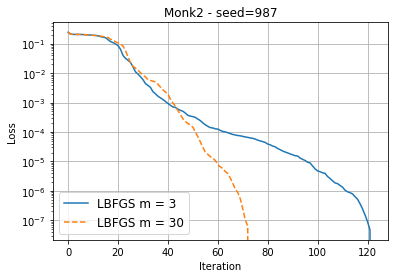

In [5]:
pos_train = (0,0)
figsize = (12, 4)

plt.plot(f_lbfgs_m_3 - f_lbfgs_m_3[-1], linestyle='-')
plt.plot(f_lbfgs_m_30 - f_lbfgs_m_30[-1], linestyle = '--')
plt.title('Monk'+monk+' - seed={}'.format(seed))
plt.ylabel("Loss")
plt.xlabel('Iteration')
plt.grid()
plt.yscale('log')
plt.legend(['LBFGS m = {}'.format(m1),'LBFGS m = {}'.format(m2)], loc='lower left', fontsize='large')
plt.savefig('./results/LBFGS/m{}-{}_lbfgs.eps'.format(monk, seed), format='eps')
plt.show()